In [75]:
from herbie import Herbie
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "heavy"
from toolbox import EasyMap, pc
import cartopy.crs as ccrs
import cartopy.feature as feature
import pandas as pd

from matplotlib.patches import Rectangle
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pytz
import os, shutil
import json

import warnings

# supress because removal of old datafiles is handled outside herbie
warnings.filterwarnings("ignore")

from bmwflib import (
    clear_directory,
    get_var,
    make_figure,
    plot_cities,
    make_basemap,
    make_title,
)

%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [109]:
run = pd.Timestamp.utcnow().floor("6h").tz_localize(None)
fxx = 6

# config determines the directories in which to save each graphic
with open("..//config/hrdps_config.json") as f:
    config = json.load(f)

✅ Found ┊ model=rdps ┊ product=10km/grib2/ ┊ 2025-Jun-11 00:00 UTC F06 ┊ GRIB2 @ local ┊ IDX @ None


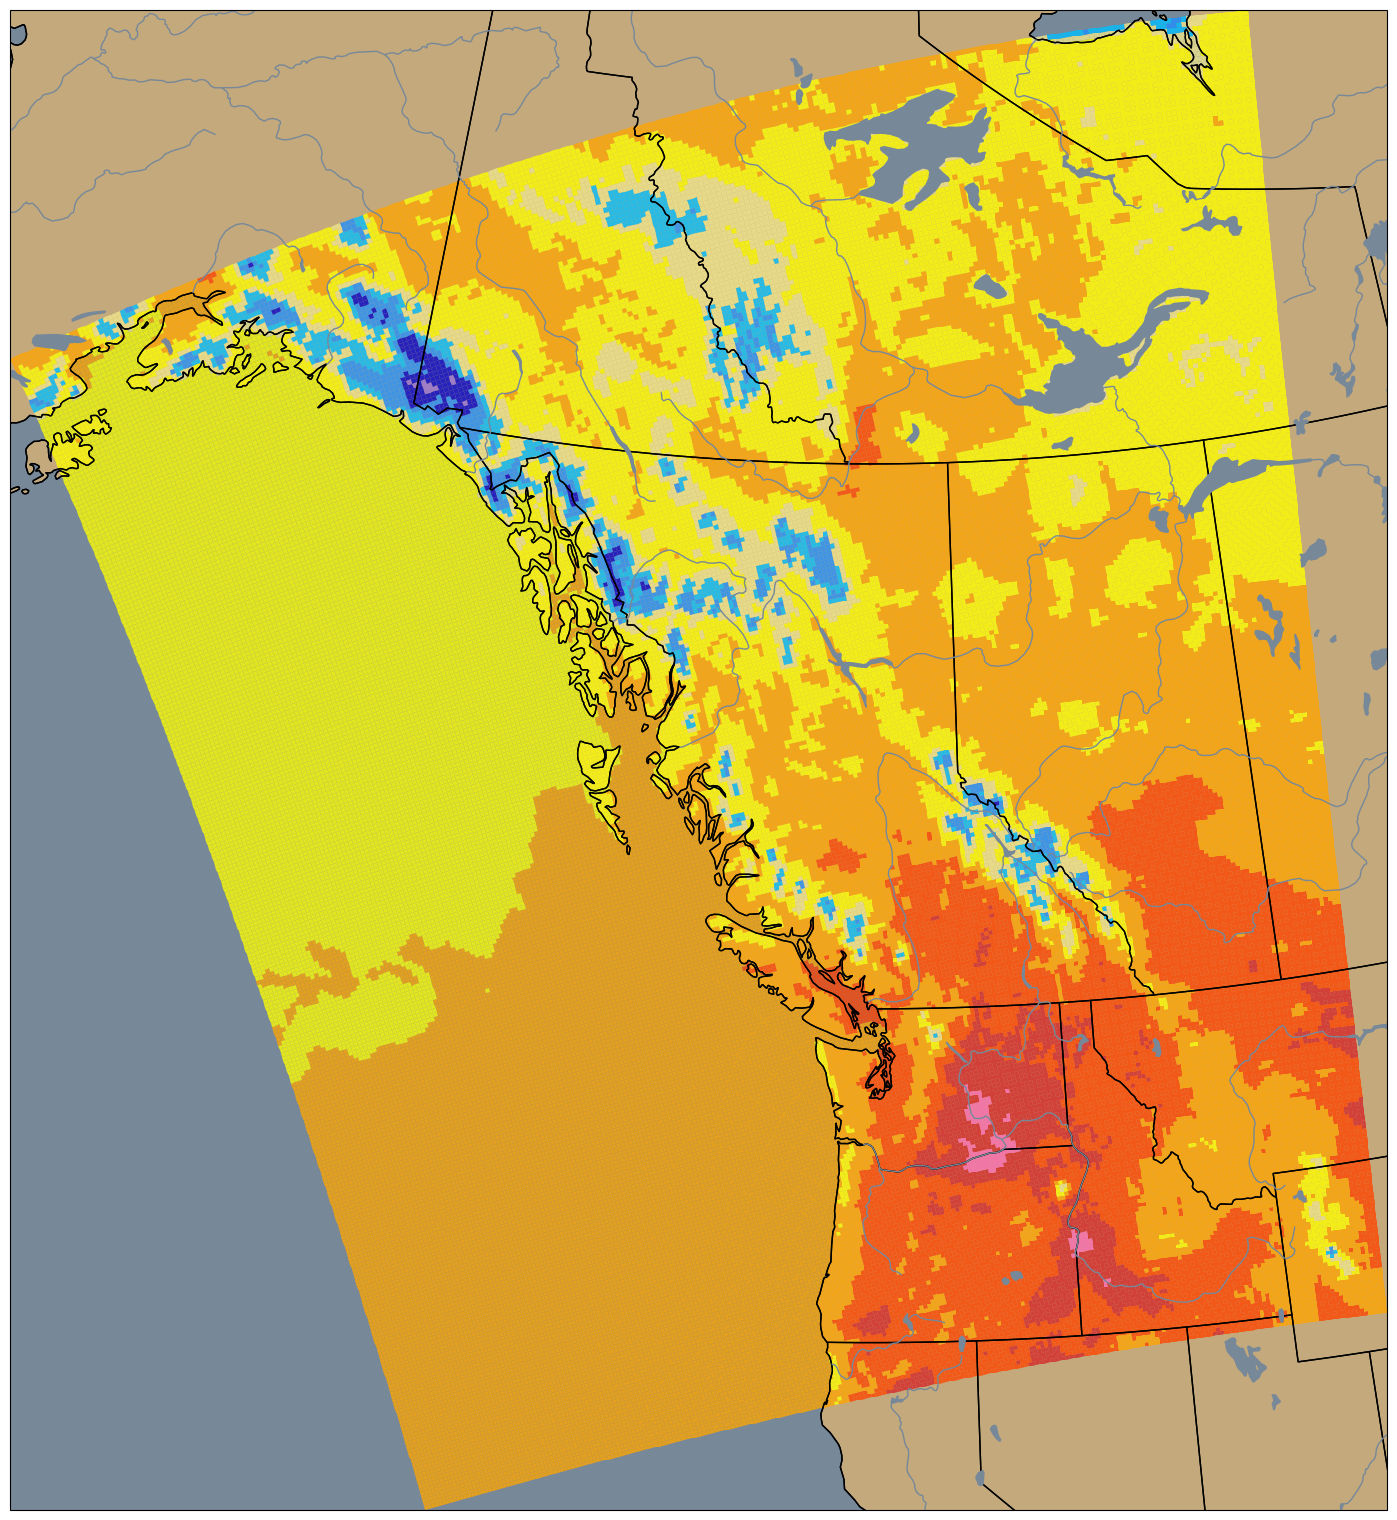

In [120]:
ds = get_var(run, "rdps", fxx, "TMP", "TGL_2")
# ds = ds.where(ds.x < 800)
ds = ds.sel(x=slice(220, 480), y=slice(200, 500))
ds["t2m"] -= 273.15
# slice out only the domain we care about
# ds.set_index({"x": "latitude", "y": "longitude"})
# ds = ds.where(ds.longitude == slice(-195, -97) and ds.latitude == slice(30, 73))
fig, ax = make_figure()
# ax.set_extent([-140, -110, 46, 65])

# basemap
make_basemap(ax)

# configure colormaps
t_cmap = mpl.colors.ListedColormap(
    [
        "#FFFAFA",
        "#C0C0C0",
        "#4B0082",
        "#8B008B",
        "#9400D3",
        "#9370DB",
        "#0000CD",
        "#1E90FF",
        "#00BFFF",
        "#F0E68C",
        "#FFFF00",
        "#FFA500",
        "#FF4500",
        "#d62728",
        "#FF69B4",
        "#800000",
        "#000000",
    ]
)
t_bounds = [
    -40,
    -35,
    -30,
    -25,
    -20,
    -15,
    -10,
    -5,
    -1,
    1,
    5,
    10,
    15,
    20,
    25,
    30,
    35,
    40,
]
t_norm = mpl.colors.BoundaryNorm(t_bounds, t_cmap.N)

# plot 2m temperature
t2m = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m,
    cmap=t_cmap,
    norm=t_norm,
    antialiased=True,
    transform=pc,
    alpha=0.8,
)

In [114]:
ds

<xarray.Dataset> Size: 15MB
Dimensions:              (y: 824, x: 935)
Coordinates:
    time                 datetime64[ns] 8B 2025-06-11
    step                 timedelta64[ns] 8B 06:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 6MB 18.15 18.18 18.21 ... 45.49 45.41
    longitude            (y, x) float64 6MB 217.1 217.2 217.2 ... 349.8 349.8
    valid_time           datetime64[ns] 8B ...
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 3MB 22.27 22.22 22.2 ... 17.05 17.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    model:                   rdps
    product:                 10km/grib2/
    description:             Canada's Regional Deterministic Prediction Syste...
    remote_grib:             /Users/andrew/data/rdps/20250611/CMC_reg_TMP_TGL...
    local_grib:              /Users/andrew/data/rdps/20250611/CMC_reg_TMP_TGL...
    search:                  None

TypeError: Dimensions of C (1201, 2400) should be one smaller than X(1201) and Y(2400) while using shading='flat' see help(pcolormesh)

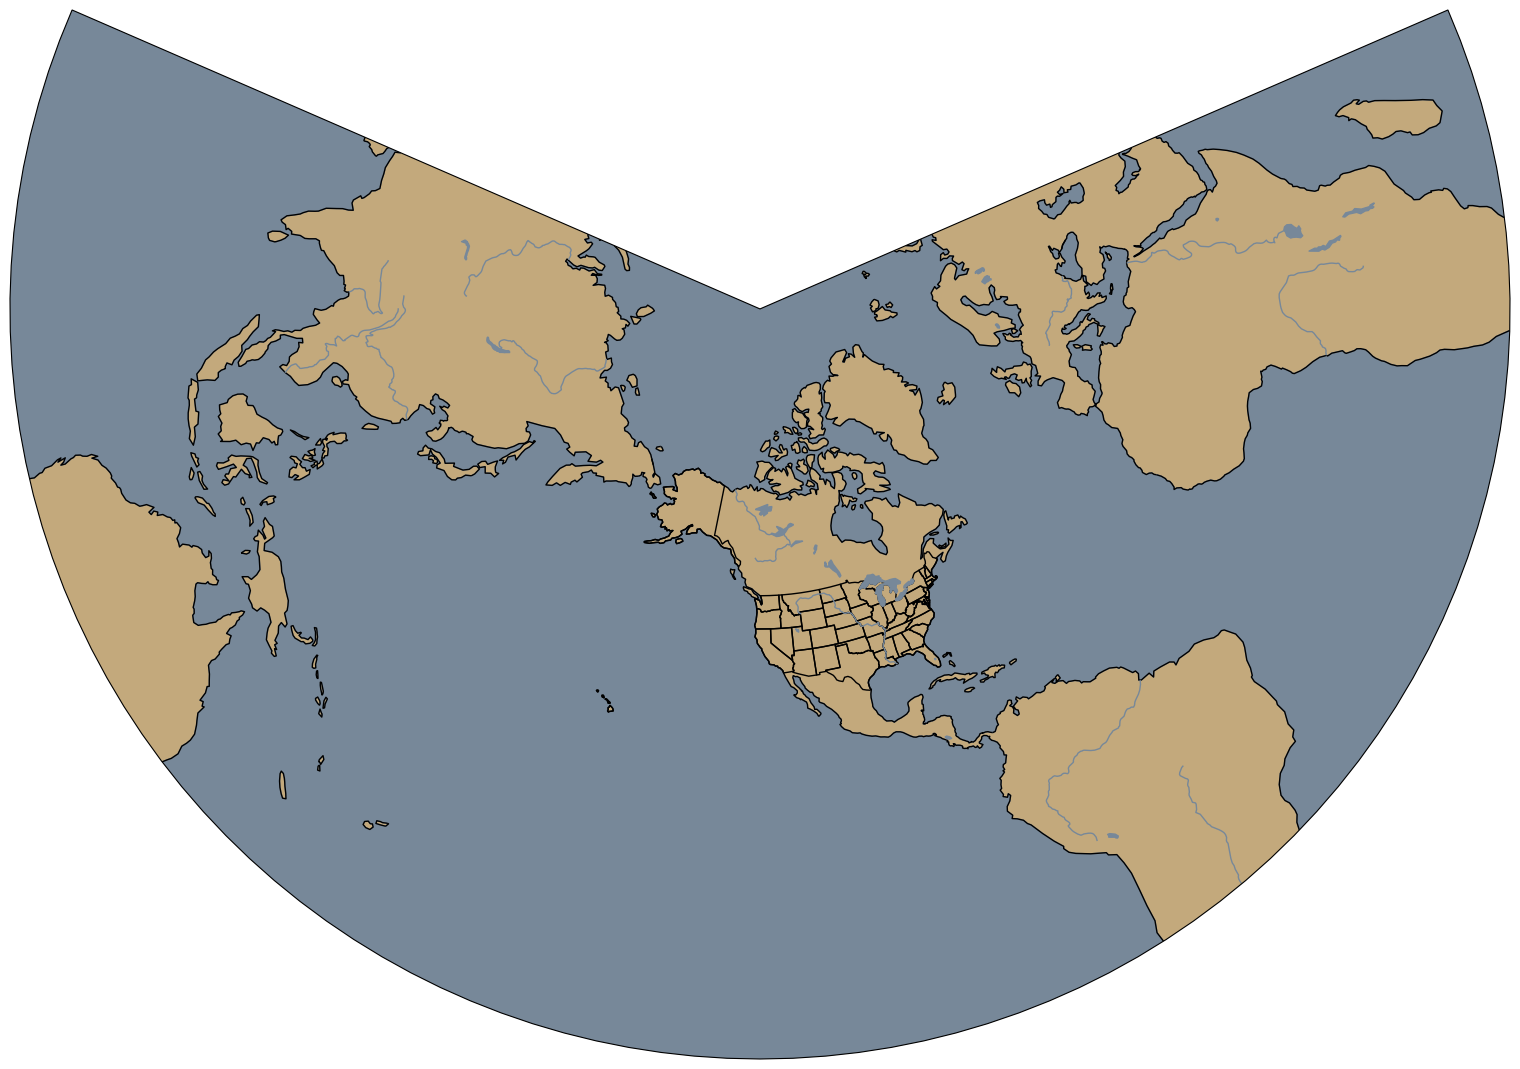

In [89]:
fig, ax = make_figure()
make_basemap(ax)

pr = ax.pcolormesh(
    ds2.latitude,
    ds2.longitude,
    ds2["t"],
    antialiased=True,
    transform=pc,
)

In [ ]:
def get_var(run, model, fxx, var, lev):
    """
    helper function to initialize herbie objects in a list comp
    """
    ds = Herbie(
        run,
        model=model,
        fxx=fxx,
        variable=var,
        level=lev,
    ).xarray()

    # if the variable name is unknown, assign it
    if "unknown" in ds:
        ds = ds.rename({"unknown": var})

    return ds